In [9]:
import pandas as pd
import pm4py
import os

os.environ["PATH"] += os.pathsep + 'C:/Users/25052288840/Downloads/Graphviz/bin'

In [10]:
from pm4py.objects.bpmn.importer import importer as bpmn_importer

model_path = 'L1 -  Tempo fixed.xml'
log_path = 'Log sintetico L1 -  Tempo fixed_simulation_logs.mxml'

In [11]:
bpmn = bpmn_importer.apply(model_path)

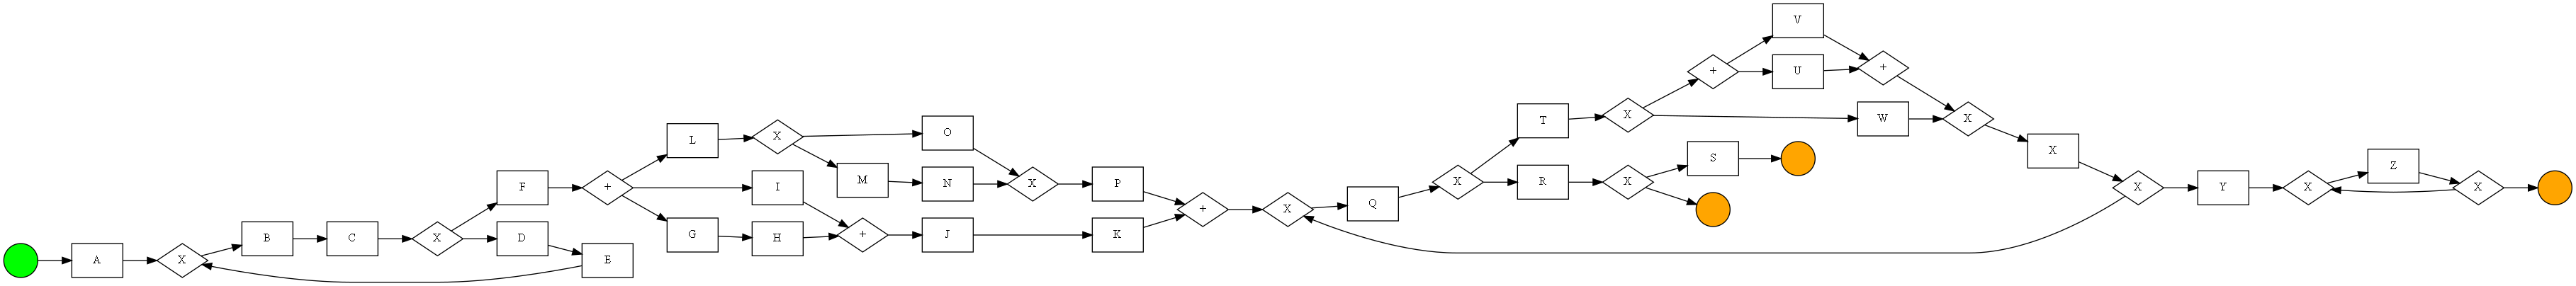

In [12]:
pm4py.view_bpmn(bpmn)

In [13]:
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply(log_path)

AttributeError: 'NoneType' object has no attribute 'properties'

In [28]:
print(log[0]) #prints the first trace of the log
print(len(log[0]))
print(log[0][0]) #prints the first event of the first trace

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173688', 'AMOUNT_REQ': '20000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10629', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 13, 10, 37, 37, 26000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
26
{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}


In [29]:
print(log[1]) #prints the first trace of the log
print(len(log[1]))

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173691', 'AMOUNT_REQ': '5000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10809', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 10, 14, 17, 34, 633000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
39


In [21]:
print(type(log[1]))

<class 'pm4py.objects.log.obj.Trace'>


In [23]:
log[1].attributes['concept:name']

'173691'

In [30]:
counter = [(trace.attributes['concept:name'], len(trace)) for trace in log]

In [32]:
len_events = [item[1] for item in counter]

In [36]:
n_traces = len(log)
n_eventos = sum(len_events)
max_eventos = max(len_events)
min_eventos = min(len_events)

In [40]:
print(f'Total de casos: {n_traces}')
print(f'Total de eventos: {n_eventos}')
print(f'Eventos por caso: Mínimo {min_eventos}  Máximo {max_eventos}  Média {n_eventos / n_traces:0.2f}')

Total de casos: 13087
Total de eventos: 262200
Eventos por caso: Mínimo 3  Máximo 175  Média 20.04


In [60]:
#Exibir o comprimento de alguns traces
import random
sampled_lens = random.sample(len_events, 20)
print(sampled_lens)

[22, 3, 35, 3, 18, 6, 3, 86, 12, 77, 3, 48, 30, 20, 3, 47, 3, 7, 29, 7]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

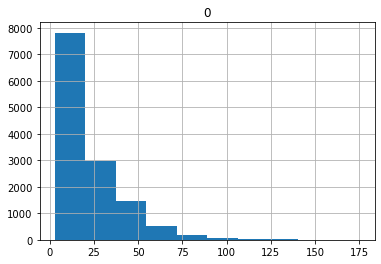

In [63]:
#Histograma do comprimento dos traces
df = pd.DataFrame(len_events)
df.hist()

In [13]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'A_SUBMITTED': 13087}
End activities: {'W_Valideren aanvraag': 2747, 'W_Wijzigen contractgegevens': 4, 'A_DECLINED': 3429, 'W_Completeren aanvraag': 1939, 'A_CANCELLED': 655, 'W_Nabellen incomplete dossiers': 452, 'W_Afhandelen leads': 2234, 'W_Nabellen offertes': 1290, 'W_Beoordelen fraude': 57, 'O_CANCELLED': 279, 'A_REGISTERED': 1}


In [6]:
petri_net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)

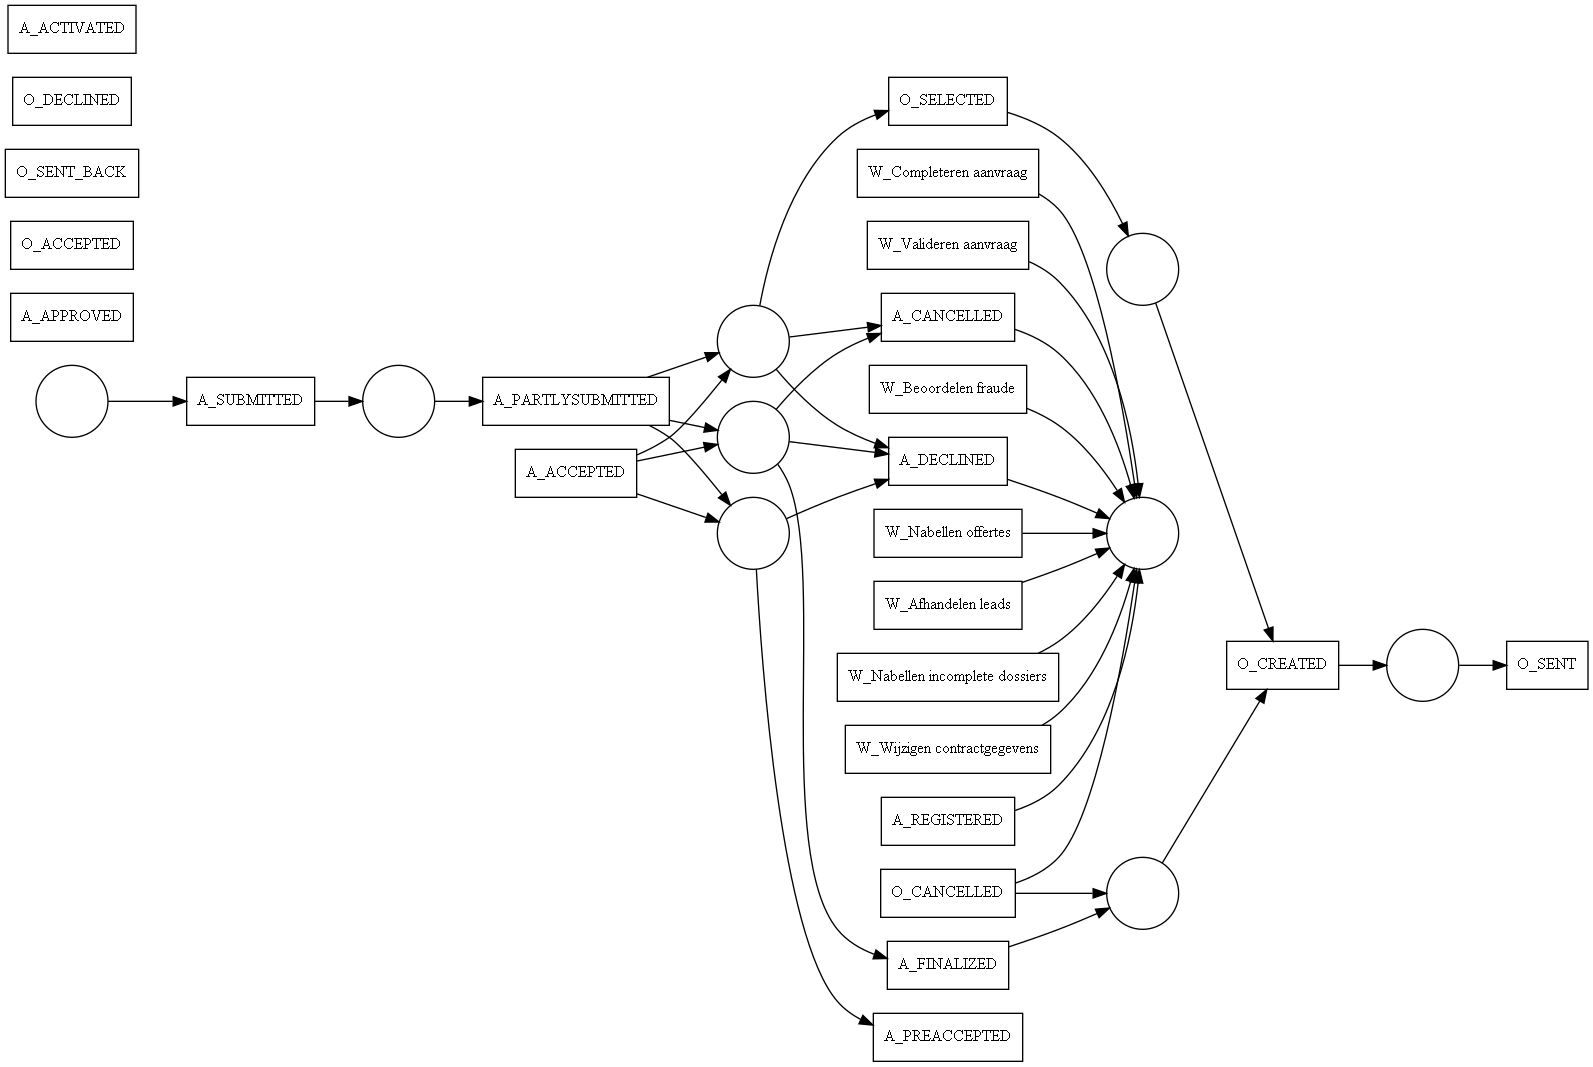

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/25052288840/Downloads/Graphviz/bin'
pm4py.view_petri_net(petri_net)

In [51]:
process_tree = pm4py.discover_process_tree_inductive(log)

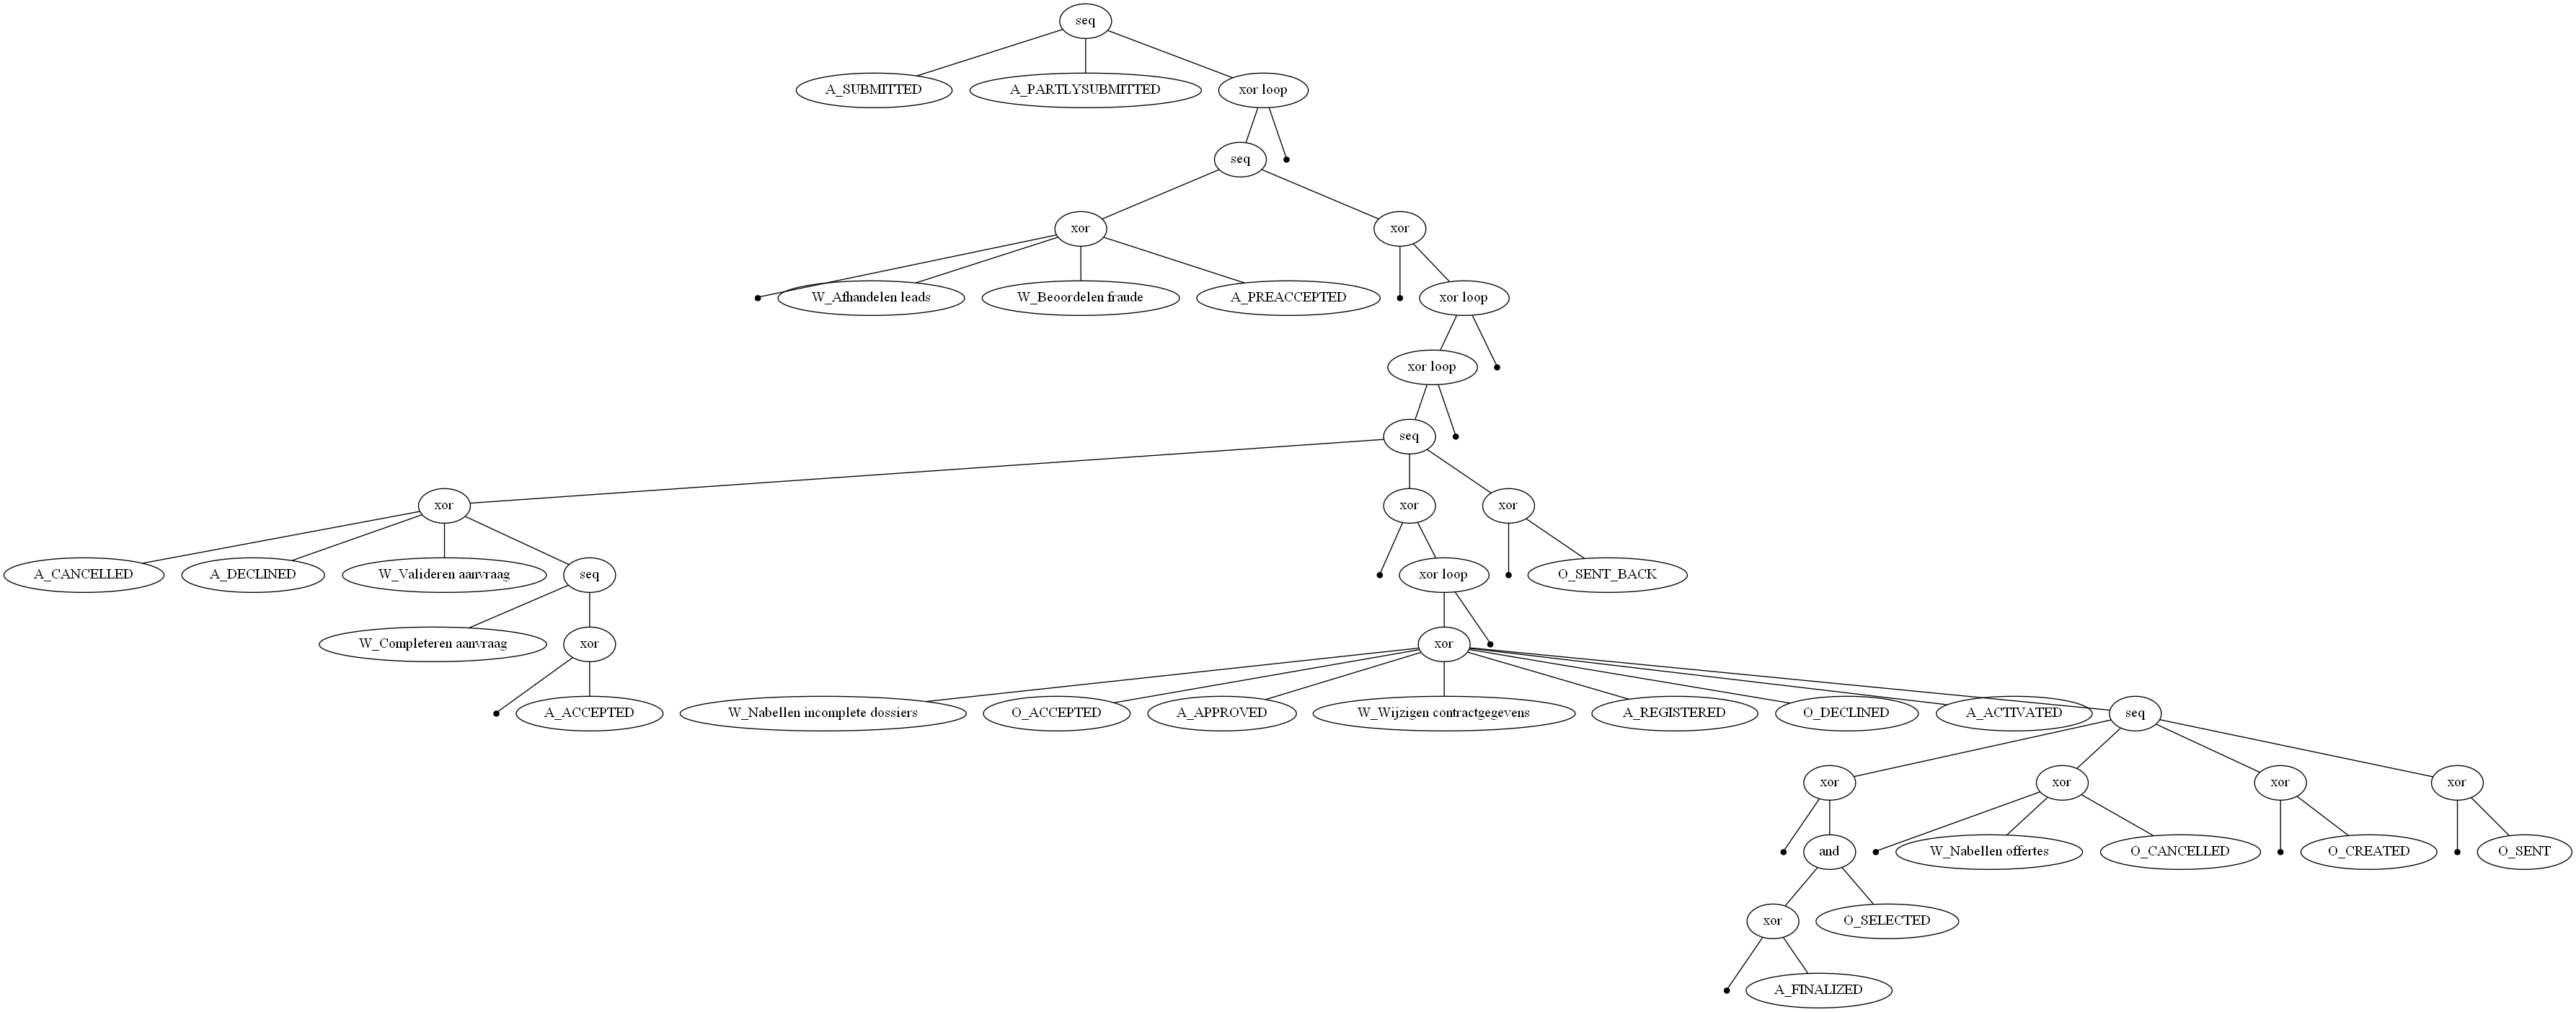

In [52]:
pm4py.view_process_tree(process_tree)

In [53]:
bpmn = pm4py.convert_to_bpmn(process_tree)

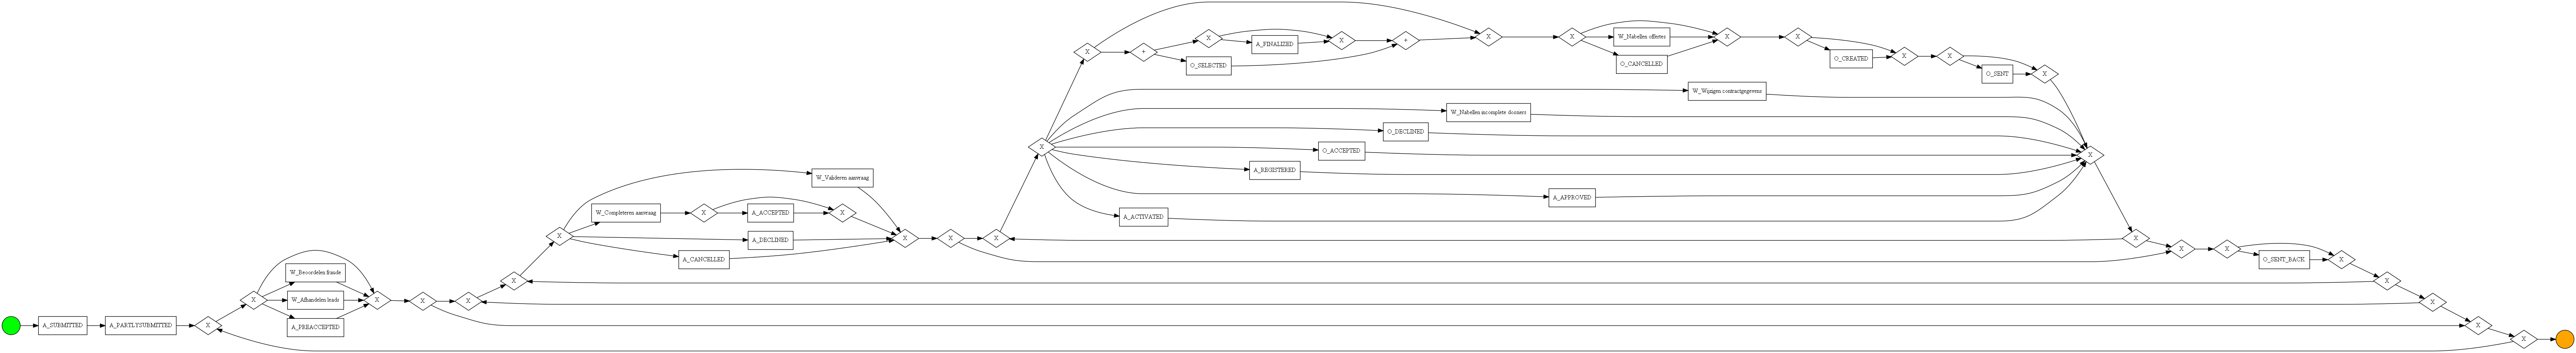

In [54]:
pm4py.view_bpmn(bpmn)

In [55]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, petri_net, initial_marking, final_marking,
                                         variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

In [56]:
print(fitness)

{'perc_fit_traces': 26.201574081149232, 'average_trace_fitness': 0.7740392525788016, 'log_fitness': 0.6722947077240501, 'percentage_of_fitting_traces': 26.201574081149232}


In [57]:
fitness_alignment = replay_fitness_evaluator.apply(log, petri_net, initial_marking, final_marking,
                                         variant=replay_fitness_evaluator.Variants.ALIGNMENT_BASED)

In [59]:
print(fitness_alignment)

{'percFitTraces': 26.201574081149232, 'averageFitness': 0.5849353525674442, 'percentage_of_fitting_traces': 26.201574081149232, 'average_trace_fitness': 0.5849353525674442, 'log_fitness': 0.39528827941259403}


In [64]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator

precision = precision_evaluator.apply(log, petri_net, initial_marking, final_marking,
                                         variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

In [70]:
precision_alignment = precision_evaluator.apply(log, petri_net, initial_marking, final_marking,
                                         variant=precision_evaluator.Variants.ALIGN_ETCONFORMANCE)

In [71]:
print(precision_alignment)

0.10239724412318274


In [65]:
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(log, petri_net, initial_marking, final_marking)

In [67]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(petri_net)

In [69]:
print(precision, gen, simp)

0.10239724412318274 0.9735932409545103 0.891891891891892


In [74]:
f_score = 2 * ((fitness_alignment['averageFitness'] * precision) / (fitness_alignment['averageFitness'] + precision))
print(f'f_score: {f_score} fitness: {fitness_alignment["averageFitness"]} precision: {precision} generaliz: {gen} simplic: {simp}')


f_score: 0.1742846720249121 fitness: 0.5849353525674442 precision: 0.10239724412318274 generaliz: 0.9735932409545103 simplic: 0.891891891891892


In [79]:
from pm4py.algo.analysis.woflan import algorithm as woflan
from pm4py.algo.conformance.alignments import algorithm as alignments
from pm4py.algo.evaluation.replay_fitness import evaluator as replay_fitness
from pm4py.algo.evaluation.generalization import evaluator as calc_generaliz
from pm4py.algo.evaluation.precision import evaluator as calc_precision
from pm4py.algo.evaluation.simplicity import evaluator as calc_simplic

def cal_measure(xes_log, petrinet, initial_marking, final_marking):
    parameters = {replay_fitness.token_replay.Parameters.ACTIVITY_KEY: 'concept:name',
                  replay_fitness.alignment_based.Parameters.ACTIVITY_KEY: 'concept:name',
                  woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True,
                  woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    is_sound = woflan.apply(petrinet, initial_marking, final_marking, parameters=parameters)
    if is_sound == True:
        fitness = replay_fitness.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=replay_fitness.Variants.ALIGNMENT_BASED)
        precision = calc_precision.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=calc_precision.Variants.ALIGN_ETCONFORMANCE)
        generaliz = calc_generaliz.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=calc_generaliz.Variants.GENERALIZATION_TOKEN)
        simplic = calc_simplic.apply(petrinet)  # ?
        f_score = 2 * ((fitness['averageFitness'] * precision) / (fitness['averageFitness'] + precision))
        print('sound', 'f_score:', f_score, 'fitness:', fitness['averageFitness'], 
              'precision:', precision, 'generaliz:', generaliz, 'simplic:', simplic)
    else:
        fitness = replay_fitness.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=replay_fitness.Variants.TOKEN_BASED)
        precision = calc_precision.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=calc_precision.Variants.ETCONFORMANCE_TOKEN)
        generaliz = calc_generaliz.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=calc_generaliz.Variants.GENERALIZATION_TOKEN)
        simplic = calc_simplic.apply(petrinet)
        f_score = 2 * ((fitness['log_fitness'] * precision) / (fitness['log_fitness'] + precision))
        print('unsound', 'f_score:', f_score, 'fitness:', fitness['log_fitness'], 
              'precision:', precision, 'generaliz:', generaliz, 'simplic:', simplic)


C:\Users\25052288840\Anaconda3\lib\site-packages\pm4py\algo\conformance\alignments\algorithm.py:19: UserWarning: please use pm4py.algo.conformance.alignments.petri_net.algorithm instead
  warnings.warn("please use pm4py.algo.conformance.alignments.petri_net.algorithm instead")


In [80]:
cal_measure(log, petri_net, initial_marking, final_marking)

<ipython-input-79-b3dbf153fc20>:23: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.algo.evaluation.replay_fitness.algorithm instead
  fitness = replay_fitness.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=replay_fitness.Variants.TOKEN_BASED)


<ipython-input-79-b3dbf153fc20>:24: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.algo.evaluation.precision.algorithm instead
  precision = calc_precision.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=calc_precision.Variants.ETCONFORMANCE_TOKEN)


<ipython-input-79-b3dbf153fc20>:25: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.algo.evaluation.generalization.algorithm instead
  generaliz = calc_generaliz.apply(xes_log, petrinet, initial_marking, final_marking, parameters=parameters, variant=calc_generaliz.Variants.GENERALIZATION_TOKEN)



unsound f_score: 0.17772515938856337 fitness: 0.6722947077240501 precision: 0.10239724412318274 generaliz: 0.9735932409545103 simplic: 0.891891891891892


<ipython-input-79-b3dbf153fc20>:26: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.algo.evaluation.simplicity.algorithm instead
  simplic = calc_simplic.apply(petrinet)
